Go to this given URL and solve the following questions

URL: https://www.youtube.com/@PW-Foundation/videos

1. Write a python program to extract the video URL of the first five videos.
2. Write a python program to extract the URL of the video thumbnails of the first five videos.
3. Write a python program to extract the title of the first five videos.
4. Write a python program to extract the number of views of the first five videos.
5. Write a python program to extract the time of posting of video for the first five videos.

Note : Save all the data scraped in the above questions in a CSV file.

In [ ]:
from flask import Flask, render_template, request, jsonify
from flask_cors import CORS, cross_origin
import requests
from urllib.request import urlopen as uReq
import logging
import os
import shutil
import re

import csv

BASE_DIR = os.path.dirname(os.path.abspath(__file__))
logging.basicConfig(filename=os.path.join(BASE_DIR, "scrapper.log"), level=logging.INFO)

app = Flask(__name__)

print("Youtube Scrap")


@app.route("/", methods=['GET'])
def homepage():
    return render_template("index.html")


@app.route("/review", methods=['POST', 'GET'])
def index():
    if request.method == 'POST':
        try:
            query = request.form['content'].replace(" ", "")
            # fake user agent to avoid getting blocked by Google
            headers = {
                "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"}

            # fetch the search results page
            response = requests.get(f"https://www.youtube.com/@{query}/videos", headers=headers)
            res = response.text

            # Video
            videoids = re.findall('"videoRenderer":{"videoId":".*?"', res)
            # thumbnail
            thumbnails = re.findall('"thumbnail":{"thumbnails":\[{"url":".*?"', res)
            # Title
            titles = re.findall('"title":{"runs":\[{"text":".*?"', res)
            # Views
            views = re.findall('"shortViewCountText":{"accessibility":{"accessibilityData":{"label":".*?"', res)
            # Published Time
            published_time = re.findall('"publishedTimeText":{"simpleText":".*?"', res)

            report_list = [
                ['S No', 'Video url', 'Thumbnail', 'Title', 'Views', 'Published Time']
            ]
            for i in range(6):
                temp = []
                temp.append(i + 1)
                temp.append('https://www.youtube.com/watch?v=' + videoids[i].split('"')[-2])
                temp.append(thumbnails[i].split('"')[-2])
                temp.append(titles[i].split('"')[-2])
                temp.append(views[i].split('"')[-2])
                temp.append(published_time[i].split('"')[-2])
                report_list.append(temp)
            file_name = os.path.join(BASE_DIR, query + '.csv')
            with open(file_name, 'w') as csvfile:
                csvwriter = csv.writer(csvfile)
                for row in report_list:
                    csvwriter.writerow(row)
            return render_template('result.html', report_list=report_list, channel=query)
            # return "Success"
        except Exception as e:
            logging.info(e)
            return 'something is wrong'
    else:
        return render_template('index.html')


if __name__ == "__main__":
    app.run(host='0.0.0.0', port=5000, debug=True)

#### Output:

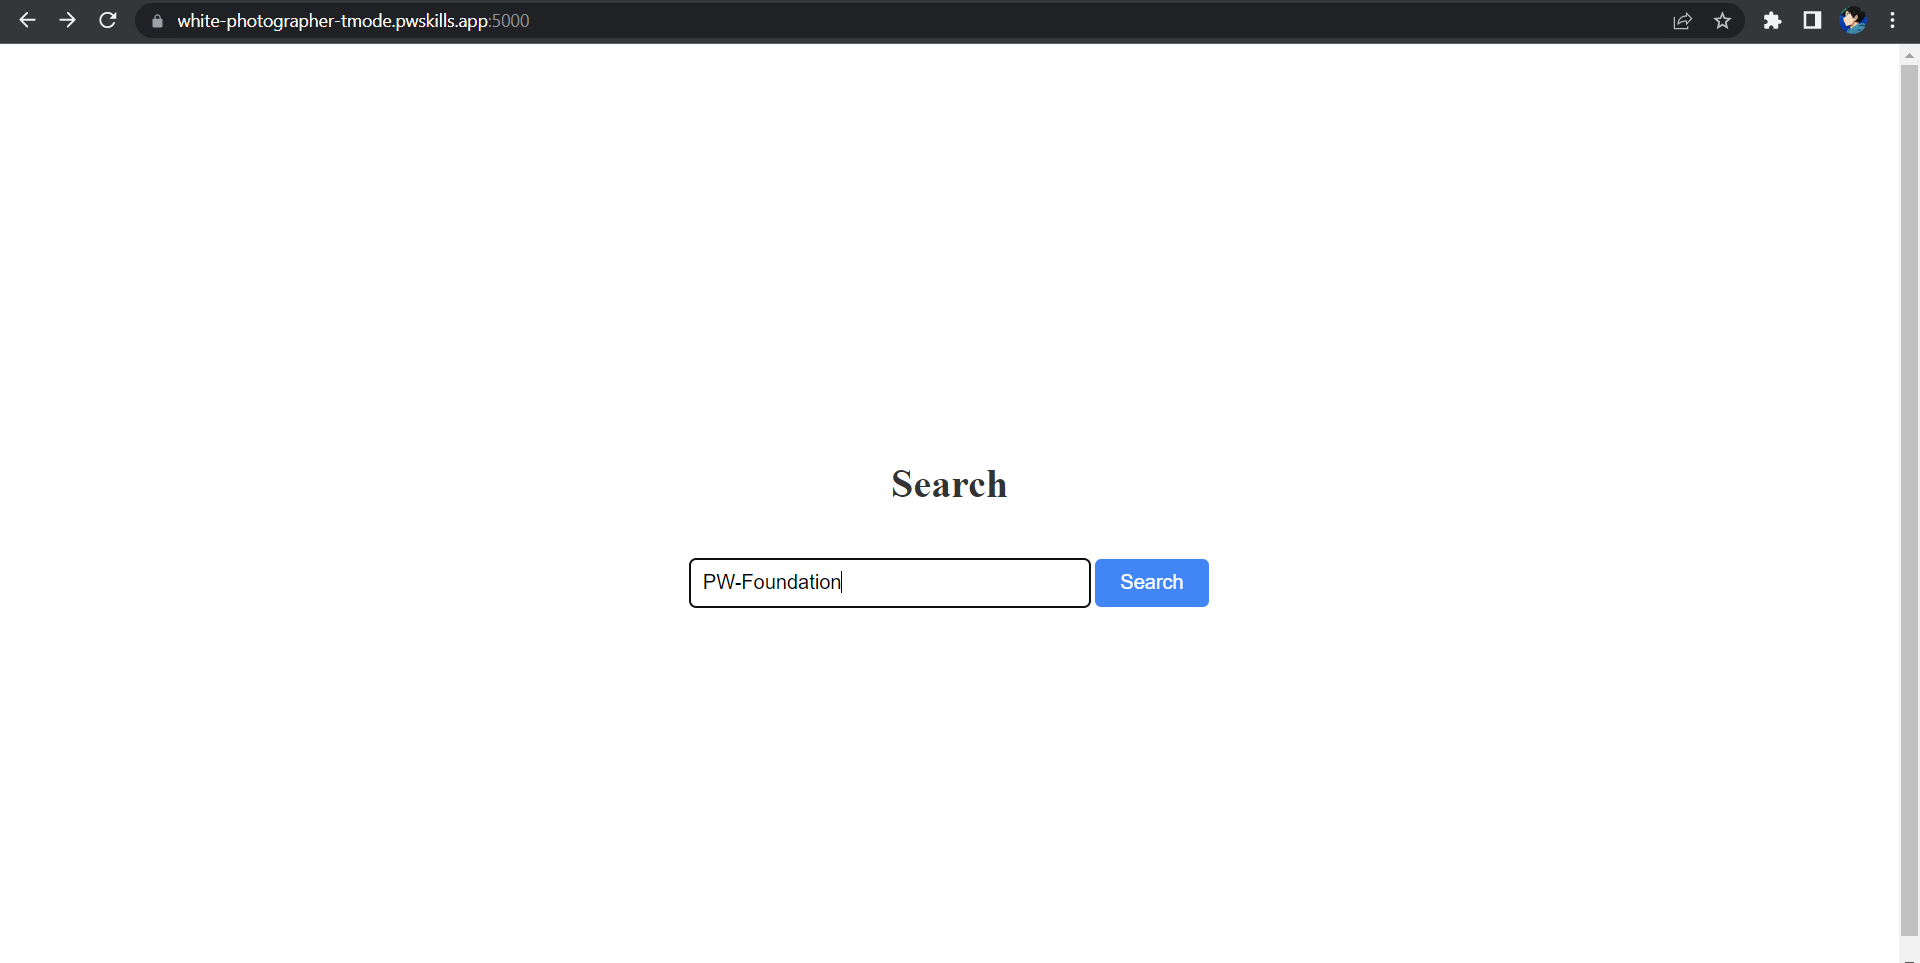

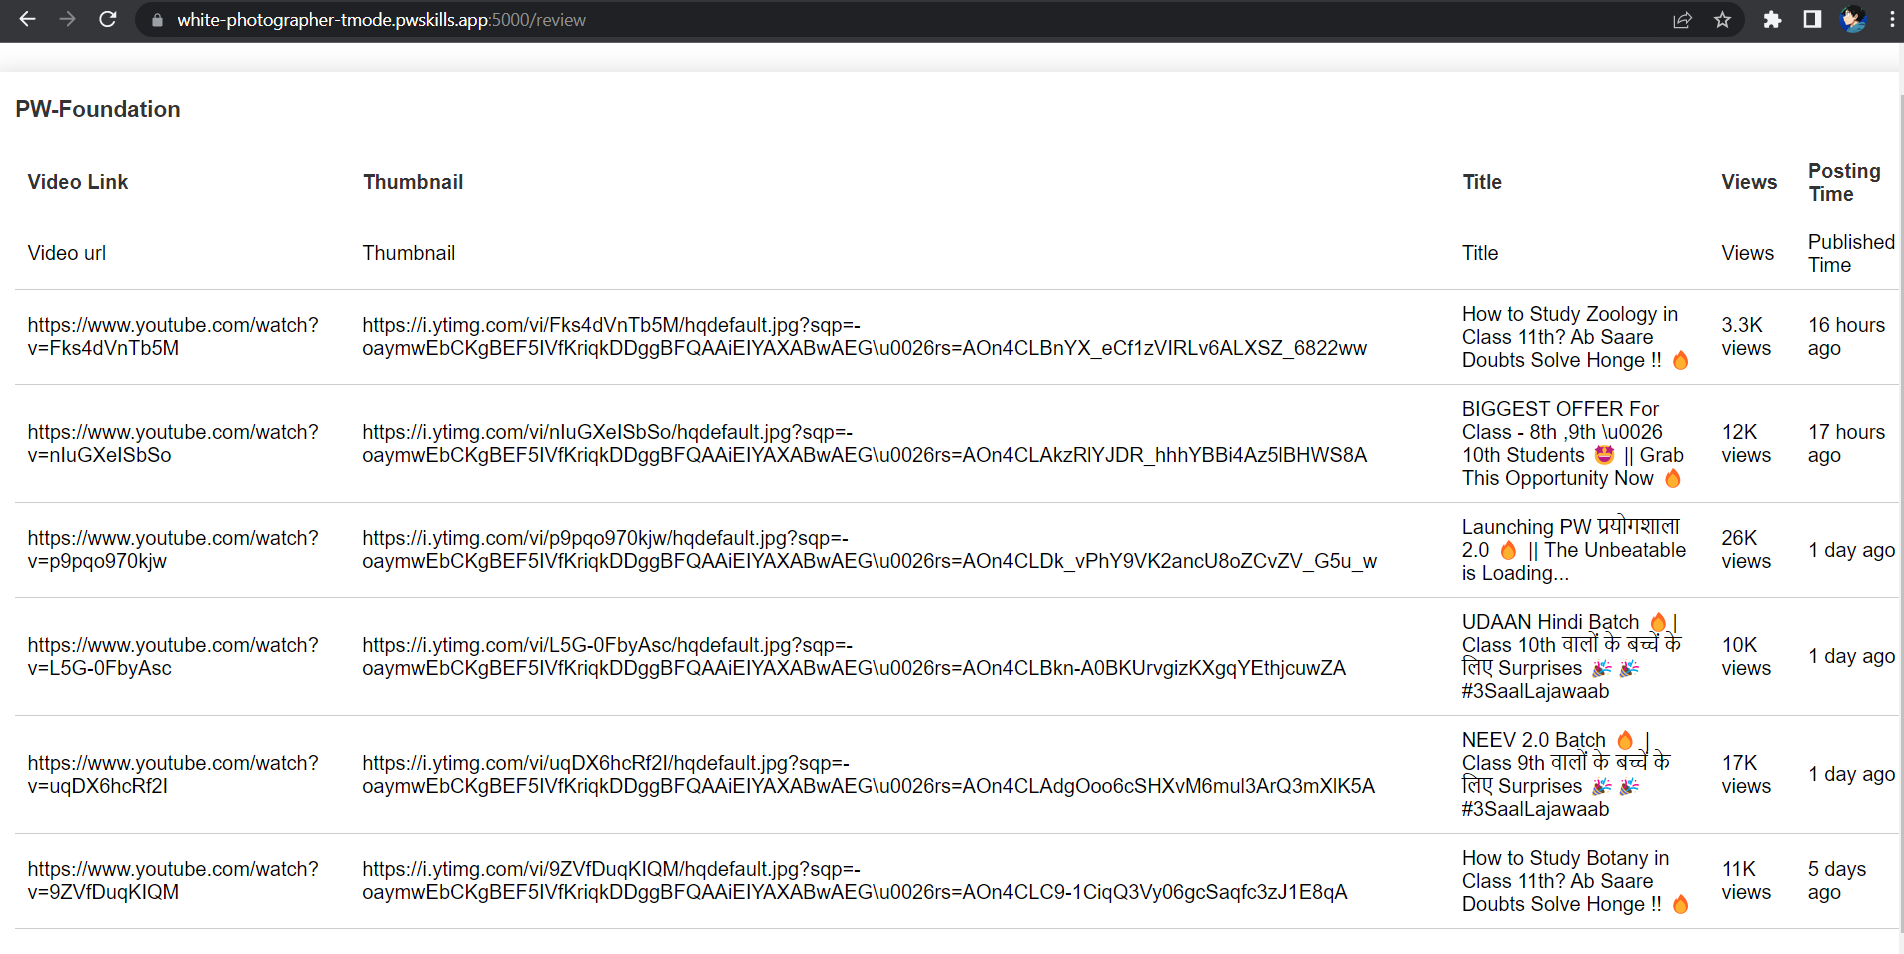

#### CSV File link :https://github.com/Sonusrj/youtube_scrapper/blob/main/PW-Foundation.csv